In [4]:
#librairies
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from sklearn.model_selection import train_test_split ### split le dataset en deux pour avoir une parti d'entrainement eet l'autre test
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D
import numpy as np
import os

In [ ]:
#installons une librairie qui contient la fonction Mish
!pip install echoAI

In [ ]:
#appel
from echoAI.Activation.Keras.custom_activations import Mish

In [5]:
cifar= tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test)= cifar.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [7]:
num_train, height, width, depth = x_train.shape 

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:





num_test = x_test.shape[0] 

num_classes = np.unique(y_train).shape[0] # 10 classes

X_train = x_train.reshape(x_train.shape[0],depth, height,width) # transforme un vecteur en matrice pour x_train

X_test = x_test.reshape(x_test.shape[0],depth, height,width)


In [10]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(height,width,depth),strides=(1, 1), padding='same',activation='elu'))


model_cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(height,width,depth),strides=(1, 1), padding='same',activation='elu'))

model_cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(height,width,depth),strides=(1, 1), padding='same',activation='elu'))


model_cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(height,width,depth),strides=(1, 1), padding='same',activation='elu'))


model_cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(height,width,depth),strides=(1, 1), padding='same',activation='elu'))

model_cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(height,width,depth),strides=(1, 1), padding='same',activation='relu'))

model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(64,kernel_size=(3,3),input_shape=(height,width,depth),strides=(1, 1), padding='same',activation=tf.nn.swish))

model_cnn.add(Conv2D(64,kernel_size=(3,3),strides=(1, 1), padding='same',activation=tf.nn.swish))

model_cnn.add(Conv2D(64,kernel_size=(3,3),strides=(1, 1), padding='same',activation=tf.nn.swish))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(128,kernel_size=(3,3),strides=(1, 1), padding='same',activation='elu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(128,kernel_size=(3,3),strides=(1, 1), padding='same',activation='elu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(256,kernel_size=(3,3),strides=(1, 1), padding='same',activation=tf.nn.swish))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Dropout(0.25))


model_cnn.add(Flatten())

model_cnn.add(Dense(512,activation=tf.nn.swish))

model_cnn.add(Dense(512,activation=tf.nn.swish))
model_cnn.add(Dropout(0.50))
model_cnn.add(Dense(10,activation=tf.nn.softmax))

In [11]:
model_cnn.summary() ### la structure du modèle

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [12]:
model_cnn.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model_save = "modeles/CNN_KONGO.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_save, save_weights_only=True, verbose=1)

In [14]:
resultat = model_cnn.fit(x_train,y_train,epochs=50, callbacks=[cp_callback])

Epoch 1/50
1563/1563 [==============================] - ETA: 0s - loss: 2.1161 - accuracy: 0.2153
Epoch 00001: saving model to modeles/CNN_KONGO.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1161 - accuracy: 0.2153
Epoch 2/50
1556/1563 [============================>.] - ETA: 0s - loss: 1.6662 - accuracy: 0.3832
Epoch 00002: saving model to modeles/CNN_KONGO.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6656 - accuracy: 0.3832
Epoch 3/50
1559/1563 [============================>.] - ETA: 0s - loss: 1.4237 - accuracy: 0.4773
Epoch 00003: saving model to modeles/CNN_KONGO.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4234 - accuracy: 0.4773
Epoch 4/50
1558/1563 [============================>.] - ETA: 0s - loss: 1.2397 - accuracy: 0.5526
Epoch 00004: saving model to modeles/CNN_KONGO.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2397 - accuracy: 0.5525
Epoch 5/50
1561/1563 [==================

In [15]:

model_cnn.save('CNN_KONGO.h5')

In [16]:
model_cnn.load_weights('CNN_KONGO.h5')

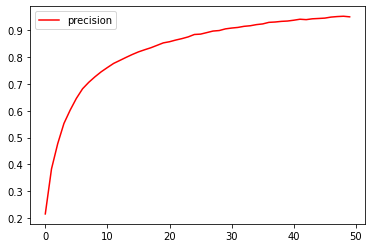

In [17]:
#voir graphiquement la précision du modèle 
plt.plot(resultat.history['accuracy'],color='red', label='precision')
plt.legend()
plt.show()

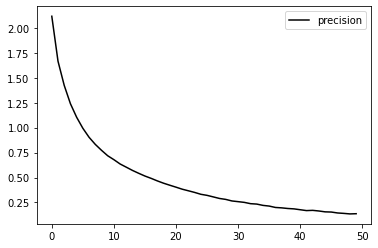

In [18]:
#voir graphiquement la précision du modèle 
plt.plot(resultat.history['loss'],color='black', label='precision')
plt.legend()
plt.show()

In [19]:
resultat2= model_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7086 - accuracy: 0.7994


In [29]:
score= model_cnn.evaluate(x_train, y_train,verbose=0)
print('Test score:', score[0] )
print('Test Précision:', score[1])

Test score: 0.08392351865768433
Test Précision: 0.9758800268173218


In [30]:
erreur_test=score[0]
precision_test=score[1]

In [22]:
prediction=model_cnn.predict(x_test)

In [23]:
prediction[0]

array([2.2590377e-06, 1.3290195e-06, 9.1638052e-05, 9.7930843e-01,
       8.6937198e-06, 2.0532645e-02, 5.2817883e-05, 1.4695229e-06,
       3.3338131e-07, 3.6915745e-07], dtype=float32)

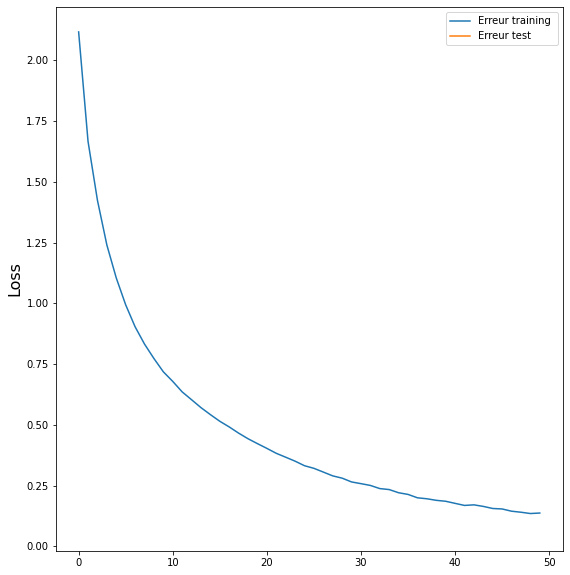

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
#plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(resultat.history['loss'], label='Erreur training ')
plt.plot(score[0], label='Erreur test')

plt.legend(loc='upper right')

#plt.subplot(1, 2, 2)
#plt.ylabel('Accuracy', fontsize=16)
#plt.plot(resultat.history['accuracy'], label='Training Accuracy')
#plt.plot(resultat.history['val_acc'], label='Validation Accuracy')
#plt.legend(loc='lower right')
plt.show()